# Top of Atmosphere (TOA) Equilibrium

In the previous model, the heat capacity of the atmosphere is at least one order of magnitude smaller than the earth heat capacity. As a consequence, the temperature of the atmosphere $T_a$ adjusts itself very rapidly to the surface temperature and the relation $ T_s^4 = 2 T_a^4$ is very rapidly verified. You can check it using the following code : change the surface temperature $T_s$ and look at the behavior of the atmosphere temperature $T_a$. We can see that in less than one year, the atmosphere temperature adjusts itself to the surface temperature. 


-----------------------------------
Equilibrium air temperature  : 252.26892457611436 kelvin
final atmosphere temperature : 252.2689245760432 kelvin


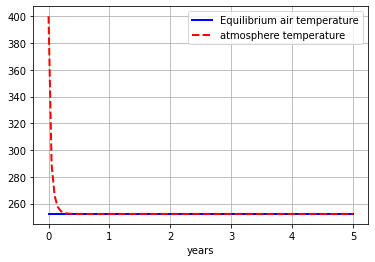

In [19]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 14 10:44:30 2020

@author: herve.guillard@inria.fr
"""
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def ebm(y, t):
  """simple two layers 0d energy budget model with fixed surface temperature """
  """ geophysical constants """
  Cs=2.08e+8       # effective heat capacity of earth J K-1 m-2
  Ca=1.0e+7        # effective heat capacity of atmosphere
  S=1370           # solar constant in w m-2
  alpha =0.3       # albedo
  sigma = 5.67e-8  # Boltzmann constant w m-2 k-4 
  epsilon = 0.77  # atmosphere gray body emmissivity 
  temps, tempa = y

  dydt = [0,\
          (sigma*epsilon*temps**4.-2*epsilon*sigma*tempa**4)/Ca ]
  return dydt
""" ------------------------------"""
""" define initial conditions """
""" ------------------------------"""
T_sur=300
y0=[T_sur,400]           # initial temperature in Kelvin 
""" ------------------------------"""
""" define time range """
""" ------------------------------"""
tM_year=5.                         #Max time in years 
tmax=tM_year*365.25*24*60*60        # Max time in seconds

t_year = np.linspace(0, tM_year, 101) 
t_sec = np.linspace(0, tmax, 101)
""" ------------------------------"""
""" solve the ode """
""" ------------------------------"""
sol = odeint(ebm, y0, t_sec)
print('-----------------------------------')
print('Equilibrium air temperature  :', sol[100,0]/(2**0.25),'kelvin')
print('final atmosphere temperature :', sol[100,1],'kelvin' )
""" ------------------------------"""
""" plot the results """
""" ------------------------------"""
plt.plot(t_year, sol[:,0]/(2**0.25), label='Equilibrium air temperature',color='blue',lw=2)
plt.plot(t_year, sol[:,1], label='atmosphere temperature',color='red',linestyle='dashed',lw=2)
plt.legend(loc='best')
plt.xlabel('years')
plt.grid()
plt.show()


Therefore in the one layer model of a planet with atmosphere, 
$$
C_s \frac{dT_s}{dt} = (1-\alpha) S/4 -\sigma T_s^4 + \epsilon \sigma T_a^4$$

$$ 
C_a\frac{dT_a}{dt} = \epsilon \sigma T_s^4 - 2 \epsilon \sigma T_a^4~~~~~~~~~~~~~~~~~
$$

it is legitimate to assume that the relation $ T_s^4 = 2 T_a^4$ holds. Adding the two previous equations, we obtain : 

$$ C\frac{d T}{dt}=S/4 -\alpha S/4 -\varepsilon' \sigma T^4$$

with 
- $C= C_a/2^{0.25} + C_s \sim C_s$ 
- $ \epsilon'=(1-\epsilon/2)$. 

and where we denote from now on $T_s$ simply as $T$